In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import wordcloud as wc

In [2]:
version2_path = "../data/raw/td_V2.db"
con2 = sqlite3.connect(version2_path)

In [3]:
light_q = """SELECT key
     FROM jira_issues"""

heavy_q = """SELECT *
     FROM jira_issues"""

commits_q = """SELECT *
    FROM git_commits"""

In [4]:
light1 = pd.read_sql(light_q, con2)

In [5]:
heavy1 = pd.read_sql(heavy_q, con2)

In [6]:
light1.shape

(30147, 1)

In [7]:
heavy1.shape

(30147, 10)

In [8]:
commits1 = pd.read_sql(commits_q, con2)

In [9]:
commits1.shape

(81072, 13)

In [10]:
heavy1.columns

Index(['PROJECT_ID', 'KEY', 'PRIORITY', 'TYPE', 'SUMMARY', 'DESCRIPTION',
       'CREATION_DATE', 'RESOLUTION_DATE', 'HASH', 'COMMIT_DATE'],
      dtype='object')

In [11]:
len(set(heavy1["KEY"])), len(heavy1)

(30147, 30147)

In [12]:
full_text = heavy1["DESCRIPTION"].to_string()

In [13]:
full_text2 = ""
for i, row in heavy1.iterrows():
    full_text2 += row["DESCRIPTION"] + " "
    

In [14]:
my_word_cloud = wc.WordCloud(background_color="white").generate(full_text)

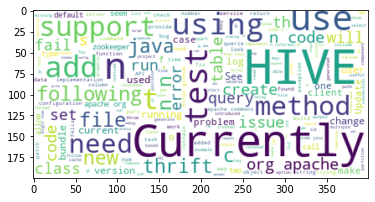

In [15]:
plt.imshow(my_word_cloud, interpolation='bilinear')

- contar nans del text
- contar nans de data ini, data fi, data due
- histograma de les longituds dels textos

In [16]:
# number of null descriptions
print("NA values:", sum(heavy1["DESCRIPTION"].isna()))
proportion = sum(heavy1["DESCRIPTION"]=="") / len(heavy1)
print("Empty values:", sum(heavy1["DESCRIPTION"]==""), f" Proportion:{proportion:.03}")
print("All the values:", len(heavy1))

NA values: 0
Empty values: 2567  Proportion:0.0851
All the values: 30147


In [17]:
# number of null descriptions
print("NA values:", sum(heavy1["SUMMARY"].isna()))
proportion = sum(heavy1["SUMMARY"]=="") / len(heavy1)
print("Empty values:", sum(heavy1["SUMMARY"]==""), f" Proportion:{proportion:.03}")
print("All the values:", len(heavy1))

NA values: 0
Empty values: 0  Proportion:0.0
All the values: 30147


In [18]:
# number of null dates
variable = "CREATION_DATE"
print(variable)
print("NA values:", sum(heavy1[variable].isna()))
proportion = sum(heavy1[variable]=="") / len(heavy1)
print("Empty values: ", sum(heavy1[variable]==""), f"Proportion: {proportion:.03}")

CREATION_DATE
NA values: 0
Empty values:  0 Proportion: 0.0


In [19]:
# number of null dates
variable = "RESOLUTION_DATE"
print(variable)
print("NA values:", sum(heavy1[variable].isna()))
proportion = sum(heavy1[variable]=="") / len(heavy1)
print("Empty values: ", sum(heavy1[variable]==""), f"Proportion: {proportion:.03}")

RESOLUTION_DATE
NA values: 0
Empty values:  0 Proportion: 0.0


In [20]:
import matplotlib.pyplot as plt

In [21]:
desc_lens = heavy1["DESCRIPTION"].apply(lambda x: len(x.split(" ")))
desc_no_outlier_lens = desc_lens[desc_lens< 20_000]

sum_lens = heavy1["SUMMARY"].apply(lambda x: len(x.split(" ")))
sum_no_outlier_lens = sum_lens[sum_lens< 40_000]

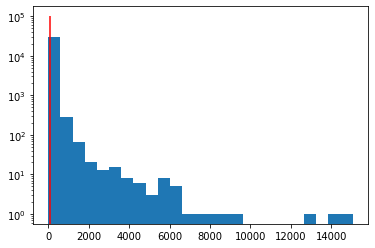

In [22]:
_ = plt.hist(desc_no_outlier_lens, log=True, bins = 25)
plt.vlines(np.mean(desc_no_outlier_lens), ymin=0, ymax = 10**5, colors="red")

In [23]:
np.mean(desc_no_outlier_lens)

89.86779244907439

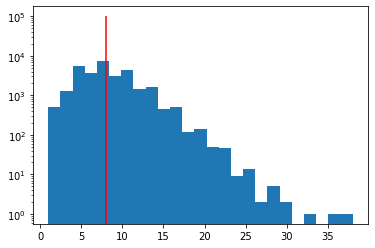

In [24]:
_ = plt.hist(sum_no_outlier_lens, log=True, bins = 25)
plt.vlines(np.mean(sum_no_outlier_lens), ymin=0, ymax = 10**5, colors="red")

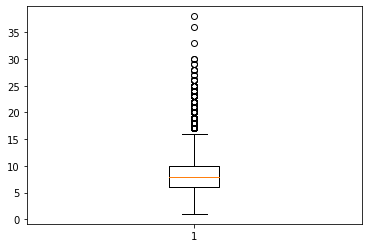

In [25]:
_ = plt.boxplot(sum_no_outlier_lens)

In [26]:
import datetime as dt

def parse_date(x):
    if x == "":
        return dt.datetime(2000, 1,1)
    return dt.datetime.strptime(x.split(" ")[0], "%Y-%m-%d")

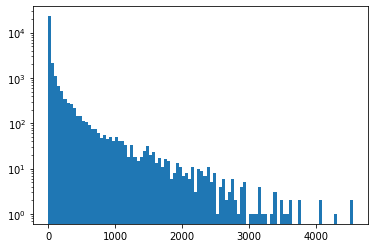

In [27]:
durations = heavy1["RESOLUTION_DATE"].apply(parse_date) - heavy1["CREATION_DATE"].apply(parse_date)
durations = [d.days for d in durations if d.days >= 0]
_ = plt.hist(durations, bins=100, log=True)

# Word clouds

### Summaries

In [28]:
text_data = heavy1[["SUMMARY", "RESOLUTION_DATE", "CREATION_DATE"]].copy()
text_data = text_data[text_data['RESOLUTION_DATE'] != ""].copy()
text_data['dur'] = heavy1["RESOLUTION_DATE"].apply(parse_date) - heavy1["CREATION_DATE"].apply(parse_date)
text_data['dur'] = [d.days for d in text_data['dur']]
perc25 = np.percentile(list(text_data['dur']), 25)
perc75 = np.percentile(list(text_data['dur']), 75)
txt1 = " ".join(list(text_data[text_data['dur'] >= perc75].copy()['SUMMARY']))
txt2 = " ".join(list(text_data[text_data['dur'] <= perc25].copy()['SUMMARY']))

(-0.5, 399.5, 199.5, -0.5)

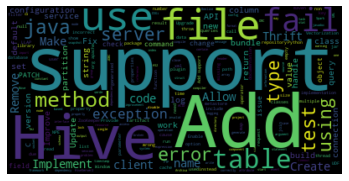

In [29]:
wc1 = wc.WordCloud().generate(txt1)
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

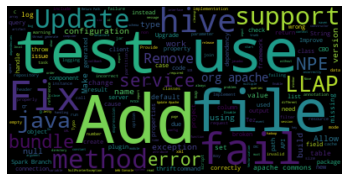

In [30]:
wc1 = wc.WordCloud().generate(txt2)
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")

In [31]:

perc25

1.0

### Descriptions

(-0.5, 399.5, 199.5, -0.5)

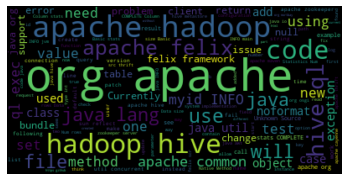

In [32]:
text_data = heavy1[["DESCRIPTION", "RESOLUTION_DATE", "CREATION_DATE"]].copy()
text_data = text_data[text_data['RESOLUTION_DATE'] != ""].copy()
text_data['dur'] = heavy1["RESOLUTION_DATE"].apply(parse_date) - heavy1["CREATION_DATE"].apply(parse_date)
text_data['dur'] = [d.days for d in text_data['dur']]
perc25 = np.percentile(list(text_data['dur']), 25)
perc75 = np.percentile(list(text_data['dur']), 75)
txt1 = " ".join(list(text_data[text_data['dur'] >= perc75].copy()['DESCRIPTION']))
txt2 = " ".join(list(text_data[text_data['dur'] <= perc25].copy()['DESCRIPTION']))
wc1 = wc.WordCloud().generate(txt1)
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

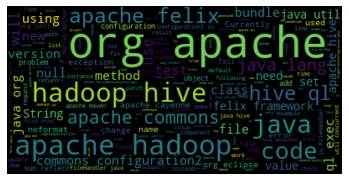

In [33]:
wc1 = wc.WordCloud().generate(txt2)
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")

### Summary by project

(-0.5, 399.5, 199.5, -0.5)

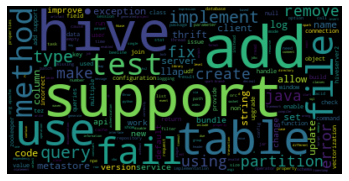

In [47]:
#heavy1['summary_length'] = heavy1['summary'].apply(lambda x: len(x.split(" ")))
theavy1 = heavy1.copy()
theavy1['duration'] = durations
theavy1 = theavy1[theavy1['duration'] > 0]

theavy1['perc25'] = theavy1.groupby('PROJECT_ID').duration.transform(lambda x: x.quantile(0.25))
theavy1['perc50'] = theavy1.groupby('PROJECT_ID').duration.transform(lambda x: x.quantile(0.50))
theavy1['perc75'] = theavy1.groupby('PROJECT_ID').duration.transform(lambda x: x.quantile(0.75))



text_data = theavy1[["SUMMARY", "duration", "perc25", "perc50", "perc75"]].copy()
text_data = text_data[text_data['duration'] > 0].copy()
txt1 = " ".join(list(text_data[text_data['duration'] >= text_data['perc75']].copy()['SUMMARY']))
txt2 = " ".join(list(text_data[text_data['duration'] <= text_data['perc25']].copy()['SUMMARY']))

txt1 = txt1.lower()
txt2 = txt2.lower()

wc1 = wc.WordCloud().generate(txt1)
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

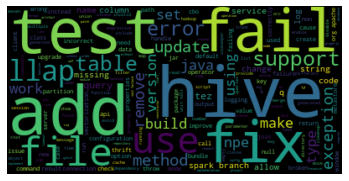

In [48]:
wc2 = wc.WordCloud().generate(txt2)
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")

# TF-idf + PCA

In [34]:
import re
text_data['summary_preproc'] = text_data['summary'].map(lambda x: re.sub('[,\.!?]', '', x))
text_data['summary_preproc'] = text_data['SUMMARY'].map(lambda x: x.lower())
text_data['SUMMARY'].head()

KeyError: 'summary'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(use_idf=True)
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(list(text_data['SUMMARY']))
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[1]
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False).head(45)

In [ ]:
tfidf_vectorizer_vectors[1].T.todense()

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD

pca = TruncatedSVD(n_components=2, n_iter=10)
pca.fit(tfidf_vectorizer_vectors)


In [ ]:
pca.components_.T
plt.scatter(pca.components_[0,:], pca.components_[1,:])

NameError: name 'pca' is not defined